In [26]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [27]:
fname = '../../cleaned_data/B00CWU48VI_y1.csv'
df_y1 = pd.read_csv(fname)
df_y1.head()

,Unnamed: 0,(Parent) ASIN,Sessions,Session Percentage,Page Views,Page Views Percentage,Buy Box Percentage,Units Ordered,Unit Session Percentage,Ordered Product Sales,Total Order Items,date,time_index
0,0,B00CWU48VI,37.0,0.12,49.0,0.14,82.0,11.0,29.73,91.15,9.0,2018-06,0.0
1,0,B00CWU48VI,50.0,0.14,63.0,0.15,87.0,11.0,22.00,94.43,7.0,2018-07,1.0
2,0,B00CWU48VI,69.0,0.17,94.0,0.19,95.0,13.0,18.84,108.20,11.0,2018-08,2.0
3,1,B00CWU48VI,32.0,0.11,44.0,0.12,89.0,6.0,18.75,51.15,5.0,2018-09,3.0
4,0,B00CWU48VI,24.0,0.09,39.0,0.11,97.0,9.0,37.50,74.85,9.0,2018-10,4.0


#### Remove unnamed column 

In [28]:
del df_y1['Unnamed: 0']
del df_y1['Total Order Items']
del df_y1['Ordered Product Sales']

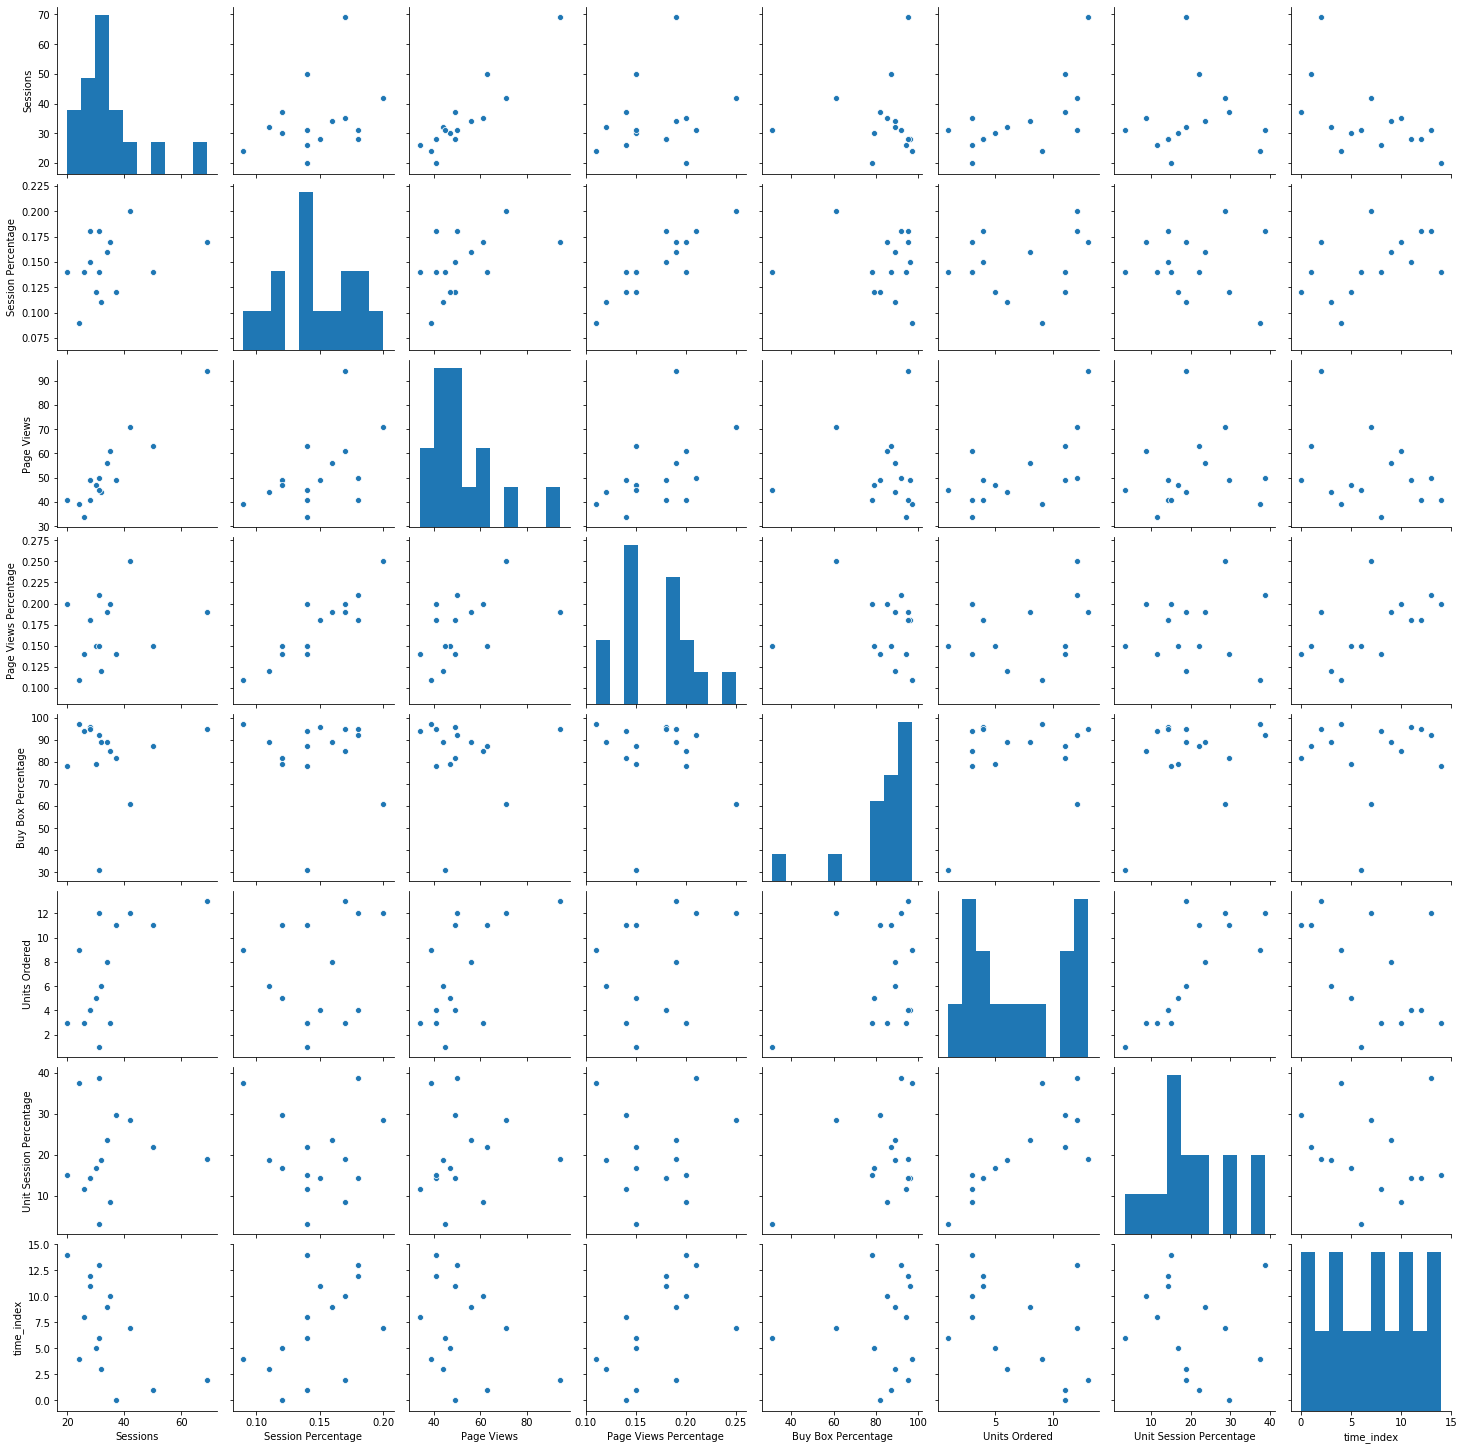

In [29]:
sns.pairplot(df_y1)

#### Model fitting 

$D_t$ = b$p_t$ + f($x_t$) + $\epsilon_t$ 

Assume that the Demand (i.e., Units Ordered) is a function of the price and features in the data, $x_t$ is a vector of features. In addition, f($x_t$) is a model of the features, which could be linear f($x_t$) = $\theta^T x_t$, or some non-linear function of $x_t$. $\theta$ is a vector of parameters, and $b$ is another parameter related to how demand reacts to price explicitly. Note that there's constrait that $b < 0$ to make sense physically (i.e., demand should go down if prices go up). The subscript t denotes the properties at a given time t.  $\epsilon_t$ is a noise term that has property $< \epsilon_t >_t = 0$, after averaging over long period of time. 

Note also, this is data for a single product. To increase the volume of data, one might consider grouping products with the same or similar categories. 

In the following, I will use a random forest regression model to fit the features. 

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 20, random_state=0)

In [31]:
#unit_price = 4.98
#price = unit_price*np.ones_like(df_y1['Page Views']) # $8.19 
#X = np.array([price, df_y1['Page Views'], df_y1['Sessions']]).T  # shape = (n_samples,n_features) = (15,3)
X = np.array(df_y1['time_index'])  # shape = (n_samples,n_features) = (15,3)
y = df_y1['Units Ordered']

In [32]:
model.fit(X.reshape(-1,1),y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=20, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [39]:
fname2 = '../../cleaned_data/B00CWU48VI_y2.csv'
df_y2 = pd.read_csv(fname2)
time_y2 = df_y2['time_index'] - 12 # since June index was 0. will update these to be less convoluted. 
df_y2['Units Ordered']

0    16.0
1    12.0
2     7.0
3     3.0
4     7.0
5     6.0
6     5.0
7     3.0
8    13.0
Name: Units Ordered, dtype: float64

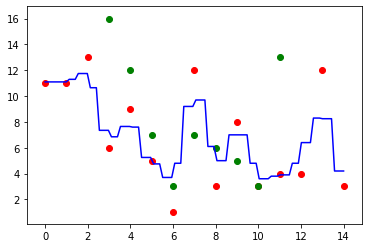

In [42]:
n_bins = 100
X_grid = np.linspace(min(X),max(X), n_bins)
X_grid = X_grid.reshape((len(X_grid),1))
plt.plot(X_grid,model.predict(X_grid),color='blue')
plt.scatter(X,y,color='red')
plt.scatter(df_y2['time_index']-12,df_y2['Units Ordered'],color='green')

### Output model prediction into file 

In [53]:
output_data = np.array([X_grid.T[0], model.predict(X_grid)])
output_df = pd.DataFrame({'time':X_grid.T[0],'quantity':model.predict(X_grid)})
output_df.to_csv('model_prediction.csv',index=False)

In [8]:
# number of bins
#n_bins = 100
#page_view_grid = np.linspace(min(df_y1['Page Views']), max(df_y1['Page Views']), n_bins)
#session_grid = np.linspace(min(df_y1['Sessions']), max(df_y1['Sessions']), n_bins)
#price_grid = np.ones_like(session_grid)*unit_price
#X_grid = np.array([price_grid,page_view_grid,session_grid]).T  # shape = (n_bins, n_features)